In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

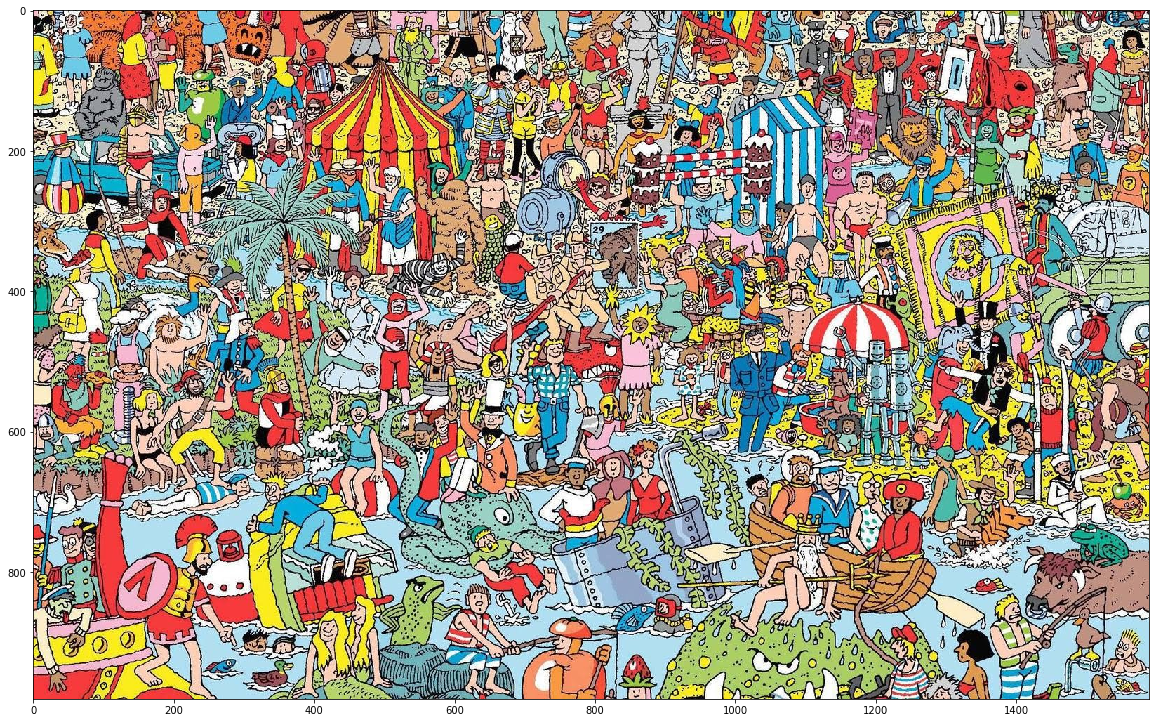

In [7]:
map = cv2.imread('where_is_waldo.jpg')
map = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.imshow(map)

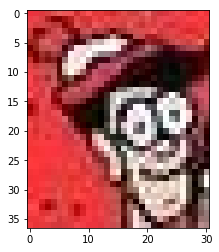

In [30]:
waldo = cv2.imread('template1.png')
waldo = cv2.cvtColor(waldo, cv2.COLOR_BGR2RGB)
plt.imshow(waldo)

In [16]:
print("map size: ", map.shape)
print("waldo head size: ", waldo.shape)

map size:  (981, 1590, 3)
waldo head size:  (37, 31, 3)


In [19]:
min_ssd = float('inf')
min_x, min_y = 0, 0

In [20]:
map_x, map_y = map.shape[0], map.shape[1]
waldo_x, waldo_y = waldo.shape[0], waldo.shape[1]

In [22]:
for i in range(map_x - waldo_x):
    for j in range(map_y - waldo_y):
        ssd = np.sum((map[i:i+waldo_x, j:j+waldo_y,:] - waldo) ** 2)
        if (ssd < min_ssd):
            min_ssd = ssd
            min_x, min_y = i, j

waldo coordinate:  74 1258


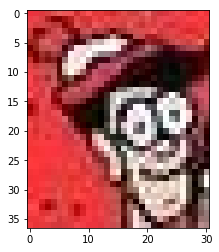

In [40]:
crop = map[min_x:min_x+waldo_x, 
           min_y:min_y+waldo_y,
           :]
plt.imshow(crop)

print("waldo coordinate: ", min_x, min_y)

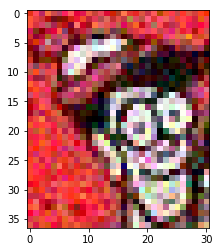

In [32]:
waldo_n = cv2.imread('template2.png')
waldo_n = cv2.cvtColor(waldo_n, cv2.COLOR_BGR2RGB)
plt.imshow(waldo_n)

In [34]:
min_ssd_n = float('inf')
min_x_n, min_y_n = 0, 0

In [35]:
for i in range(map_x - waldo_x):
    for j in range(map_y - waldo_y):
        ssd = np.sum((map[i:i+waldo_x, j:j+waldo_y,:] - waldo) ** 2)
        if (ssd < min_ssd_n):
            min_ssd_n = ssd
            min_x_n, min_y_n = i, j

waldo coordinate:  74 1258


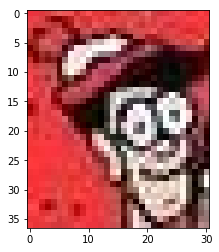

In [41]:
crop = map[min_x_n:min_x_n+waldo_x, 
           min_y_n:min_y_n+waldo_y,
           :]
plt.imshow(crop)

print("waldo coordinate: ", min_x_n, min_y_n)